<a href="https://colab.research.google.com/github/vilas-04/Banking-system/blob/main/Roll_no_24_MLDS_Practical_no_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Random forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data file/titanic.csv")
df

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,2,38.0
2,1,3,2,26.0
3,1,1,2,35.0
4,0,3,1,35.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,2,19.0
888,0,3,2,28.0
889,1,1,1,26.0


In [ ]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,2,38.0
2,1,3,2,26.0
3,1,1,2,35.0
4,0,3,1,35.0


In [ ]:
df.tail()

,Survived,Pclass,Sex,Age
886,0,2,1,27.0
887,1,1,2,19.0
888,0,3,2,28.0
889,1,1,1,26.0
890,0,3,1,32.0


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [ ]:
df.shape

(891, 4)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0


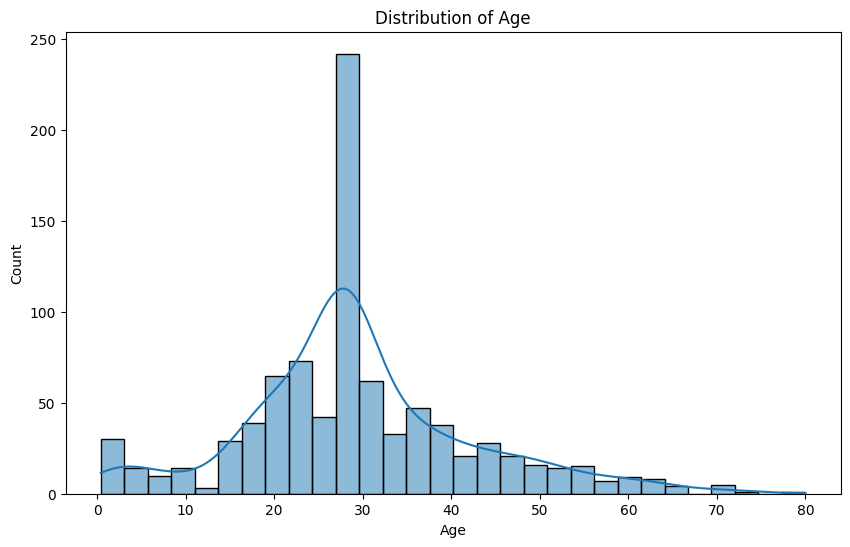

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Distribution of Age')
plt.show()

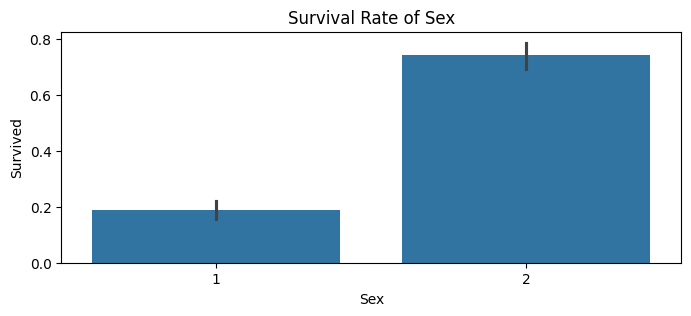

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Survival Rate of Sex')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

X=df.drop('Survived',axis=1)
y=df['Survived']
X

,Pclass,Sex,Age
0,3,1,22.0
1,1,2,38.0
2,3,2,26.0
3,1,2,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,2,19.0
888,3,2,28.0
889,1,1,26.0


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(712, 3)

In [ ]:
X_test.shape

(179, 3)

In [ ]:
y_train.shape

(712,)

In [ ]:
y_test.shape

(179,)

In [ ]:
print(y_train.dtype)
print(y_test.dtype)

int64
int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

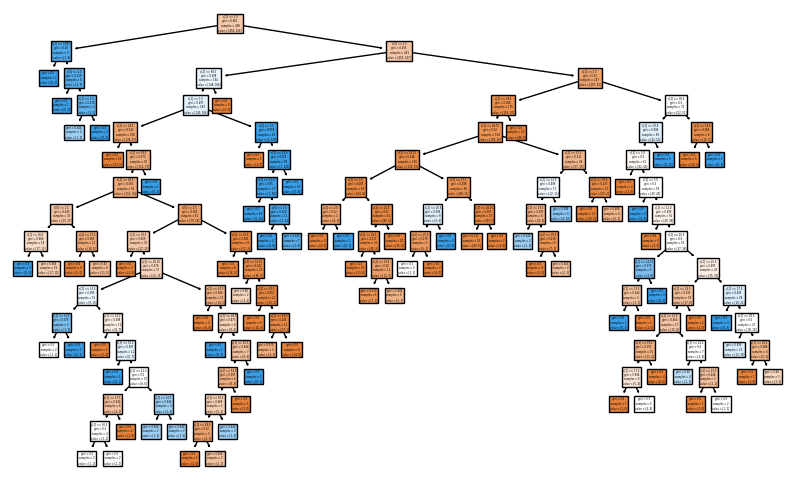

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(rf.estimators_[0],filled=True)
plt.show()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

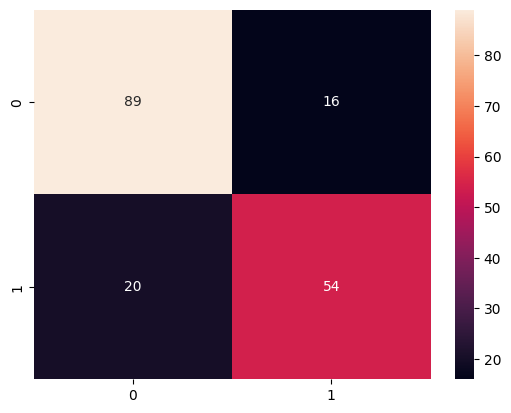

In [ ]:
from sklearn.metrics import pair_confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
rf1=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

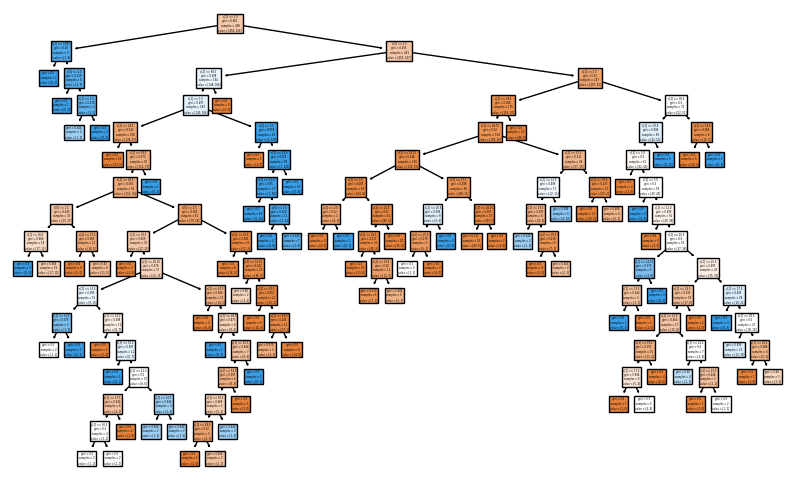

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(rf.estimators_[0],filled=True)
plt.show()

In [ ]:
y_pred=rf1.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [ ]:
from inspect import Parameter
## Preprunning
Parameter={
    'criterion':['gini','entropy','log_loss'],

    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
treemodel=rf1=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
cv=GridSearchCV(treemodel,param_grid=Parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

[Text(0.2840909090909091, 0.9705882352941176, 'x[2] <= 1.5\ngini = 0.461\nsamples = 448\nvalue = [456, 256]'),
 Text(0.06611570247933884, 0.9117647058823529, 'x[2] <= 0.875\ngini = 0.18\nsamples = 7\nvalue = [1, 9]'),
 Text(0.049586776859504134, 0.8529411764705882, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.08264462809917356, 0.8529411764705882, 'x[0] <= 2.5\ngini = 0.219\nsamples = 5\nvalue = [1, 7]'),
 Text(0.06611570247933884, 0.7941176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.09917355371900827, 0.7941176470588235, 'x[1] <= 1.5\ngini = 0.278\nsamples = 4\nvalue = [1, 5]'),
 Text(0.08264462809917356, 0.7352941176470589, 'gini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(0.11570247933884298, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(0.5020661157024794, 0.9117647058823529, 'x[0] <= 2.5\ngini = 0.456\nsamples = 441\nvalue = [455, 247]'),
 Text(0.256198347107438, 0.8529411764705882, 'x[2] <= 60.5\ngini = 0.498\nsamples = 194\nval

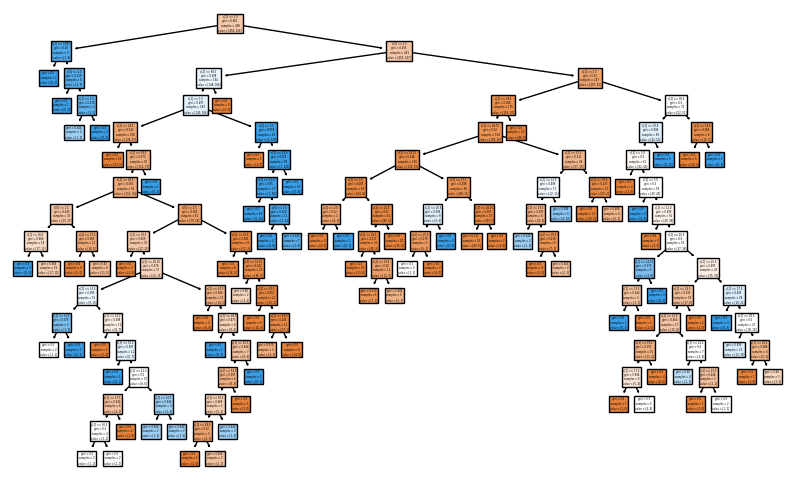

In [ ]:
rfi=RandomForestClassifier(n_estimators=100, criterion='entropy')
rfi.fit(X_train,y_train)

plt.figure(figsize=(10,6))
plot_tree(rf.estimators_[0],filled=True)

In [ ]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

In [ ]:
y_pred=rf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

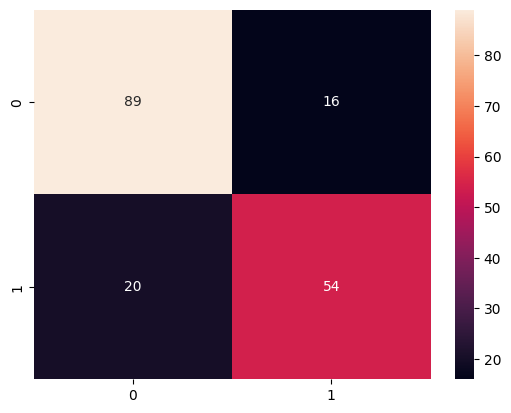

In [ ]:
from sklearn.metrics import pair_confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)